In [1]:
import os
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_WIDTH, IMG_HEIGHT = 224, 224
NUM_CLASSES = 2
BATCH_SIZE = 32
EPOCHS = 100
RANDOM_SEED = 42

def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
#         print(folder)
        img = load_img(os.path.join(folder, filename), target_size=(IMG_WIDTH, IMG_HEIGHT))
        img = img_to_array(img)
        images.append(img)
        if folder == '/kaggle/input/final-segmented-images/BKM_seg':
            labels.append(0)
        else:
            labels.append(1)
    return images, labels

bkm_images, bkm_labels = load_images('/kaggle/input/final-segmented-images/BKM_seg')
msm_images, msm_labels = load_images('/kaggle/input/final-segmented-images/MSM_seg')

# Combine images and labels
images = np.array(bkm_images + msm_images)
labels = np.array(bkm_labels + msm_labels)


x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=RANDOM_SEED)
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.25, random_state=RANDOM_SEED) # 0.25 x 0.8 = 0.2


y_train = np.array(y_train) 
y_validate = np.array(y_validate)

print(y_train.shape)  
print(y_validate.shape)  



2024-03-22 03:03:20.405198: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 03:03:20.405288: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 03:03:20.550424: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


(1977,)
(660,)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.7024 - loss: 0.8203
Epoch 1: val_accuracy improved from -inf to 0.55152, saving model to resnet50.h5.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 104s 794ms/step - accuracy: 0.7030 - loss: 0.8183 - val_accuracy: 0.5515 - val_loss: 35222.0547
Epoch 2/100
 1/61 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.8125 - loss: 0.4352

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.55152
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8125 - loss: 0.4352 - val_accuracy: 0.5515 - val_loss: 41954.8867
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.7871 - loss: 0.4168
Epoch 3: val_accuracy improved from 0.55152 to 0.55909, saving model to resnet50.h5.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step - accuracy: 0.7872 - loss: 0.4169 - val_accuracy: 0.5591 - val_loss: 488.6444
Epoch 4/100
 1/61 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.8125 - loss: 0.3842
Epoch 4: val_accuracy did not improve from 0.55909
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8125 - loss: 0.3842 - val_accuracy: 0.5591 - val_loss: 456.9236
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.7937 - loss: 0.4263
Epoch 5: val_accuracy improved from 0.55909 to 0.69848, saving model to resnet50.h5.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 316ms/step - accuracy: 0.7939 - loss: 0.4259 - val_accuracy: 0.6985

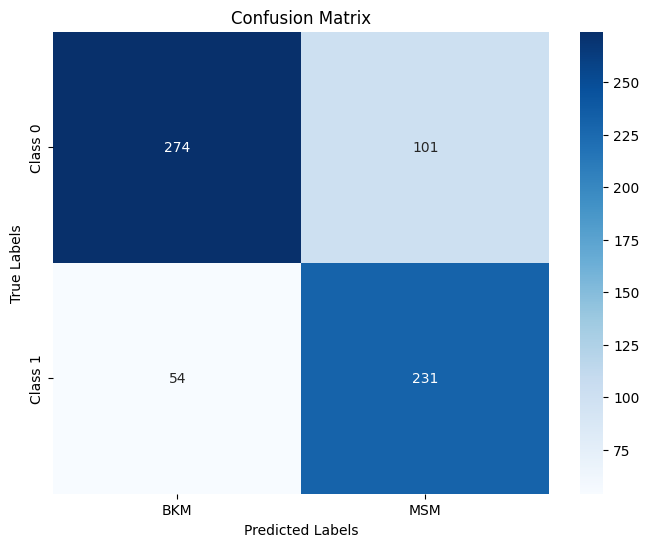

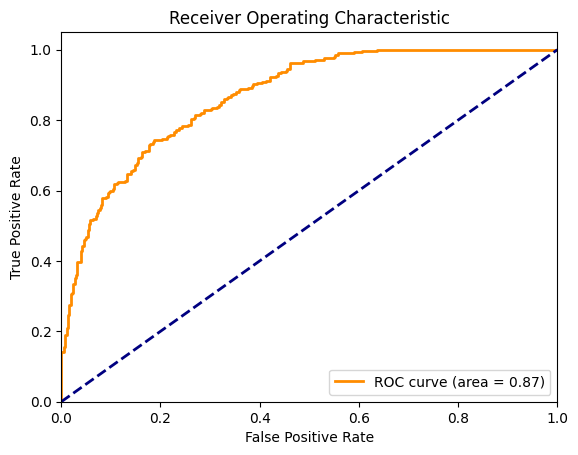

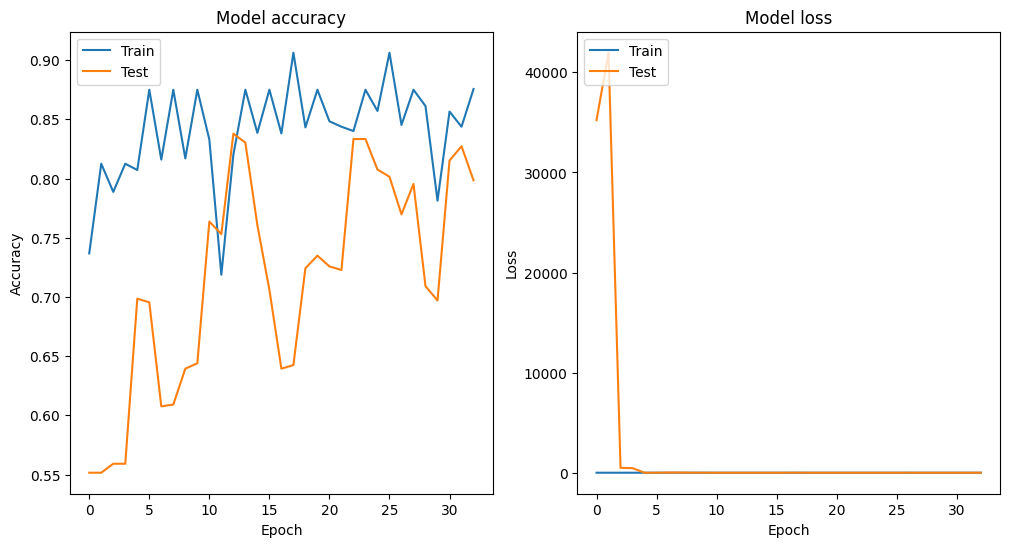

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8502 - loss: 0.4706
Test accuracy: 0.8439394235610962
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 309ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       375
           1       0.77      0.91      0.83       285

    accuracy                           0.84       660
   macro avg       0.84      0.85      0.84       660
weighted avg       0.85      0.84      0.84       660



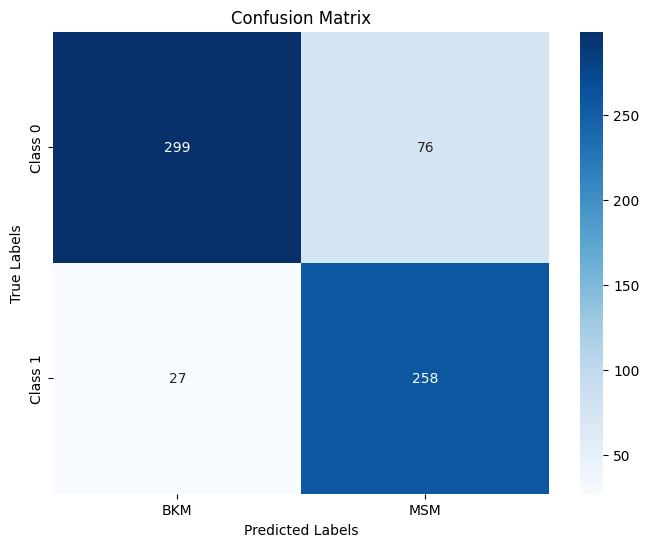

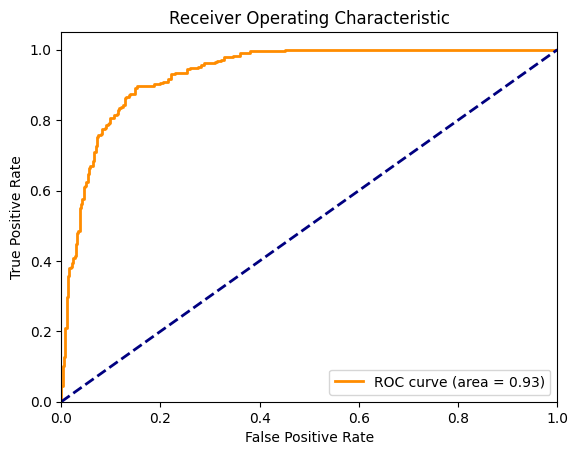

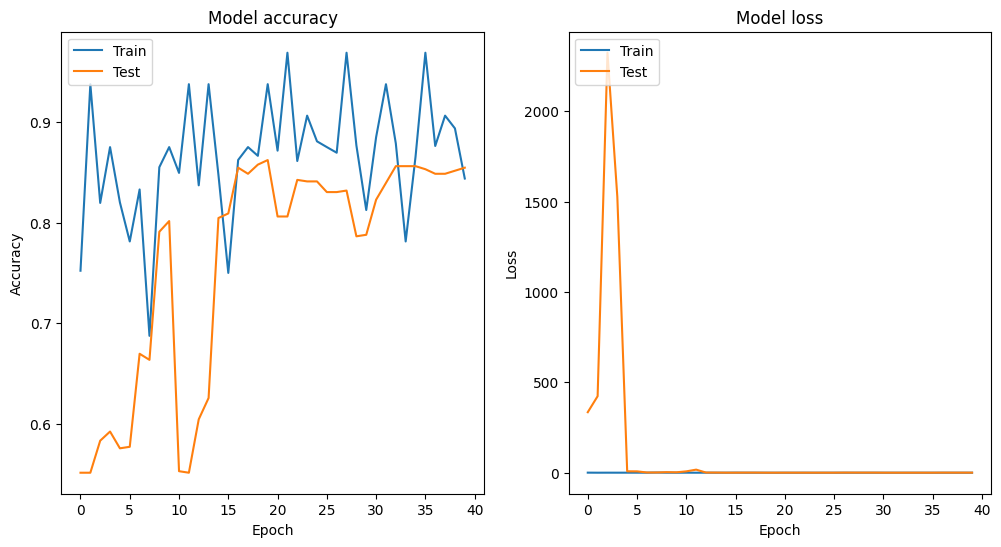

In [3]:
from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Input
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc

# Define input shape
input_shape = (224, 224, 3)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
# Create model functions for each architecture
def create_resnet50_model(input_shape):
    
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

def create_inceptionv3_model(input_shape):
    
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model


# Train each model
def train_model(model, x_train, y_train, x_validate, y_validate,modelname, epochs=100, batch_size=32):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
    model_checkpoint = ModelCheckpoint(f"{modelname}.h5.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
    history = model.fit(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                    steps_per_epoch=len(x_train) // BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_validate, y_validate),
                    callbacks=[model_checkpoint, early_stopping])
    return model, history

# Load your dataset and split into x_train, y_train, x_validate, y_validate

# Train ResNet50 model
resnet50_model = create_resnet50_model(input_shape)
for layer in resnet50_model.layers:
        layer.trainable = True
resnet50_model, resnet50_history = train_model(resnet50_model, x_train, y_train, x_validate, y_validate,"resnet50")

# Train InceptionV3 model
inceptionv3_model = create_inceptionv3_model(input_shape)
for layer in inceptionv3_model.layers:
        layer.trainable = True
inceptionv3_model, inceptionv3_history = train_model(inceptionv3_model, x_train, y_train, x_validate, y_validate,"inceptionv3")


def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


# Evaluate each model
def evaluate_model(model, history, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_acc}')
    
    y_pred = model.predict(x_test)
    y_pred_classes = (y_pred > 0.5).astype("int32")
    y_true = y_test.astype("int32")
    
    # Print classification report
    print("Classification Report:\n", classification_report(y_true, y_pred_classes))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["BKM", "MSM"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    plot_metrics(history)

# Evaluate ResNet50 model
evaluate_model(resnet50_model,resnet50_history, x_test, y_test)

# Evaluate InceptionV3 model
evaluate_model(inceptionv3_model,inceptionv3_history, x_test, y_test)




Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8447 - loss: 0.3227
Epoch 1: val_accuracy improved from -inf to 0.65606, saving model to ensemble_model.h5.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.8447 - loss: 0.3229 - val_accuracy: 0.6561 - val_loss: 0.7715
Epoch 2/100
 1/61 ━━━━━━━━━━━━━━━━━━━━ 17s 285ms/step - accuracy: 0.8438 - loss: 0.3119

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.65606
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8438 - loss: 0.3119 - val_accuracy: 0.6379 - val_loss: 0.7700
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.8558 - loss: 0.3107
Epoch 3: val_accuracy improved from 0.65606 to 0.69545, saving model to ensemble_model.h5.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 412ms/step - accuracy: 0.8557 - loss: 0.3111 - val_accuracy: 0.6955 - val_loss: 0.7171
Epoch 4/100
 1/61 ━━━━━━━━━━━━━━━━━━━━ 17s 297ms/step - accuracy: 0.8125 - loss: 0.3582
Epoch 4: val_accuracy did not improve from 0.69545
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8125 - loss: 0.3582 - val_accuracy: 0.6803 - val_loss: 0.7472
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.8573 - loss: 0.3131
Epoch 5: val_accuracy improved from 0.69545 to 0.76515, saving model to ensemble_model.h5.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 402ms/step - accuracy: 0.8571 - loss: 0.3133 - val_accuracy: 0

Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 1)         │ 25,686,913 │ input_layer_10[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 1)         │ 23,901,985 │ input_layer_10[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_1 (Average) │ (None, 1)         │          0 │ sequential_2[1][… │
│                     │                   │            │ sequential_3[1][… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 148,591,592 (566.83 MB)

 Trainable params: 49,501,346 (188.83 MB)

 Non-trainable params: 87,552 (342.00 KB)

 Optimizer params: 99,002,694 (377.67 MB)

(660,)
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.6604 - loss: 0.8056
Test accuracy: 0.6954545378684998
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 538ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.99      0.79       375
           1       0.97      0.31      0.46       285

    accuracy                           0.70       660
   macro avg       0.81      0.65      0.63       660
weighted avg       0.79      0.70      0.65       660



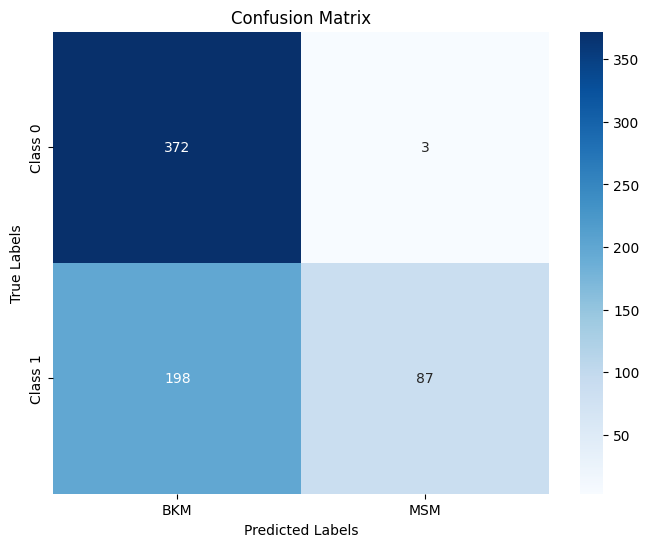

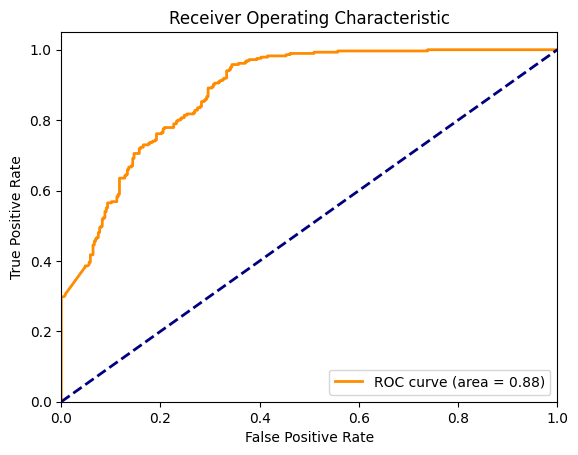

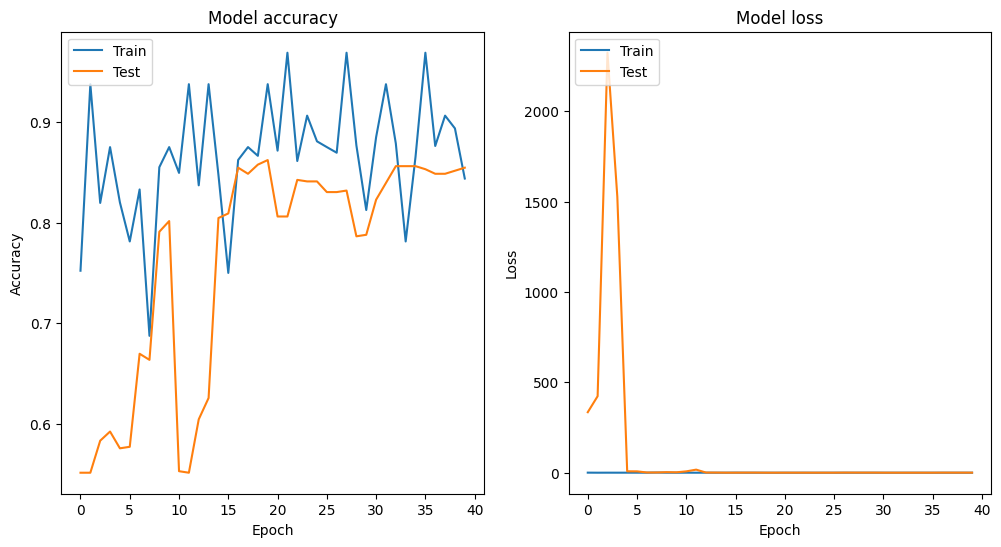

Ensemble


NameError: name 'accuracy_v' is not defined

In [5]:
from keras.layers import average
from keras.models import Model, Sequential
from keras import optimizers
from keras.optimizers import SGD
model_input = Input(shape=(224, 224, 3))
# Ensemble
def ensemble(models, x):
    preds = np.zeros((len(x), 1))
    weights = [0.5,0.5]  # Change these weights according to the performance of the models
    for i, model in enumerate(models):
        preds += weights[i] * model.predict(x)
        print(preds)
    return preds

def create_ensemble_model(models, input_shape):
    """
    This function creates an ensemble model from given list of models.
    All models should have the same input shape.
    """
    inputs = Input(shape=input_shape)
    outputs = [model(inputs) for model in models]
    y = average(outputs)
    
    model = Model(inputs=inputs, outputs=y, name='ensemble')
    
    return model

ensemble_models = [resnet50_model, inceptionv3_model]
ensemble_model = create_ensemble_model([resnet50_model, inceptionv3_model], input_shape)
ensemble_model, history = train_model(ensemble_model, x_train, y_train, x_validate, y_validate,"ensemble_model", epochs=100, batch_size=32)
ensemble_model.summary()
print(y_test.shape)
evaluate_model(ensemble_model,inceptionv3_history, x_test, y_test)
# loss, accuracy = ensemble_model.evaluate(x_test, y_test)
# loss_v, accuracy_v = ensemble_model.evaluate(x_validate, y_validate,)
# print("Ensemble")
# print("Validation: val_accuracy = %f  -  val_loss = %f" % (accuracy_v, loss_v))
# print("Test: accuracy = %f  -  loss = %f" % (accuracy, loss))


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = ensemble_model.predict(x_validate)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

print("-------------------------")

In [6]:
ensemble_preds = ensemble(ensemble_models, x_test)

ensemble_accuracy = np.mean((ensemble_preds > 0.5).astype(int) == y_test)
print(f'Ensemble Accuracy: {ensemble_accuracy}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
[[3.13709408e-01]
 [5.00000000e-01]
 [4.57028836e-01]
 [2.67533213e-02]
 [4.98629212e-01]
 [5.00000000e-01]
 [6.65441630e-16]
 [5.56776525e-15]
 [1.38508651e-04]
 [3.50937694e-01]
 [4.95513141e-01]
 [1.65302900e-08]
 [5.00000000e-01]
 [7.24368618e-08]
 [3.03908228e-03]
 [2.06421211e-01]
 [1.18549980e-01]
 [4.36693013e-01]
 [1.41437858e-01]
 [1.31235216e-02]
 [4.98256296e-01]
 [4.99998152e-01]
 [3.93712550e-01]
 [1.47709861e-01]
 [4.26279101e-09]
 [4.29771270e-22]
 [1.05631523e-01]
 [3.94654065e-01]
 [8.62647603e-17]
 [0.00000000e+00]
 [6.49906509e-03]
 [4.82980162e-01]
 [4.27478170e-07]
 [1.96652810e-08]
 [4.99999404e-01]
 [2.81405807e-01]
 [4.68522877e-01]
 [3.86405308e-09]
 [5.50424906e-09]
 [5.00000000e-01]
 [1.80949796e-17]
 [4.88731621e-06]
 [5.00000000e-01]
 [4.10598457e-01]
 [8.34395553e-10]
 [1.47200242e-01]
 [1.21192542e-10]
 [2.48948961e-01]
 [2.75131128e-19]
 [9.25738215e-02]
 [6.87123463e-03]
 [1.59420435e-17]
 [1.31657294e-12]
 [2.67